In [1]:
using Symbolics
using SymbolicNumericIntegration
using ClassicalOrthogonalPolynomials
using LinearAlgebra: dot, isdiag
using StaticArrays
using CairoMakie
#using GLMakie
using Latexify

In [6]:
include("./monomials.jl")
include("./N1kind.jl")
include("./N1Spaces.jl")
include("./symbolic_moments.jl")
include("./N1Poly.jl")
include("./outputs.jl")
include("./verifications.jl")
include("./vizN.jl")

plot_nedelec_functions_on_triangle

### $N_0^I$ : Nedelec (First kind) of degree 0

In [7]:
N0 = N1k(0)
N0xy = replace_u_xy(N0)
for ni in eachindex(N0xy)
    display(N0xy[ni])
end

2-element Vector{Num}:
 1.0 - y
       x

2-element Vector{Num}:
       y
 1.0 - x

2-element Vector{Num}:
 -y
  x

#### Visualize the functions on the reference triangle

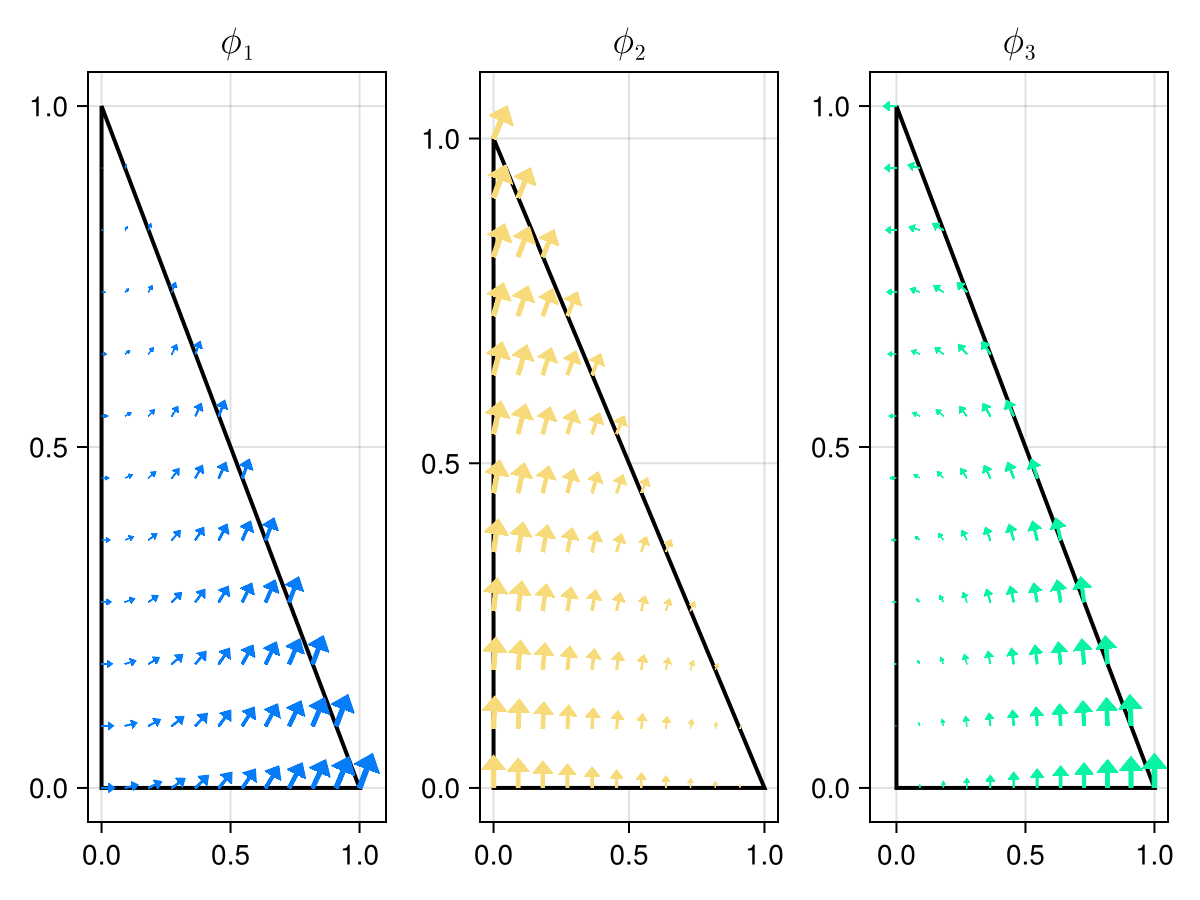

CairoMakie.Screen{IMAGE}


In [33]:
@variables u[1:2]
N0_f = [eval(build_function(N0[i], u)[1]) for i in eachindex(N0)]
f0 = plot_nedelec_functions_on_triangle(N0_f, density = 12)
display(f0)

### $N_1^I$ : Nedelec (First kind) of degree 1

In [9]:
N1 = N1k(1)
replace_u_xy(N1)
N1xy = replace_u_xy(N1)
for ni in eachindex(N1xy)
    display(N1xy[ni])
end

2-element Vector{Num}:
 (1//1) - (5//1)*y + (4//1)*(y^2)
                   x - (4//1)*x*y

2-element Vector{Num}:
 -(3//1) + (6//1)*x + (7//1)*y - (8//1)*x*y - (4//1)*(y^2)
                     -(5//1)*x + (8//1)*(x^2) + (4//1)*x*y

2-element Vector{Num}:
                   y - (4//1)*x*y
 (1//1) - (5//1)*x + (4//1)*(x^2)

2-element Vector{Num}:
                     -(5//1)*y + (4//1)*x*y + (8//1)*(y^2)
 -(3//1) + (7//1)*x + (6//1)*y - (4//1)*(x^2) - (8//1)*x*y

2-element Vector{Num}:
  (3//1)*y - (4//1)*x*y - (4//1)*(y^2)
 -(3//1)*x + (4//1)*(x^2) + (4//1)*x*y

2-element Vector{Num}:
 -y - (4//1)*x*y + (4//1)*(y^2)
 -x + (4//1)*(x^2) - (4//1)*x*y

2-element Vector{Num}:
 -(8//1)*y + (16//1)*x*y + (8//1)*(y^2)
 (16//1)*x - (16//1)*(x^2) - (8//1)*x*y

2-element Vector{Num}:
 (16//1)*y - (8//1)*x*y - (16//1)*(y^2)
 -(8//1)*x + (8//1)*(x^2) + (16//1)*x*y

#### Check the degree of the curl ($∇×N_i$)

In [10]:
verify_curl_degree(N1, u, 1)

∇×N1 = (6//1) - (12//1)*y
∇×N2 = -(12//1) + (24//1)*x + (12//1)*y
∇×N3 = -(6//1) + (12//1)*x
∇×N4 = (12//1) - (12//1)*x - (24//1)*y
∇×N5 = -(6//1) + (12//1)*x + (12//1)*y
∇×N6 = (12//1)*x - (12//1)*y
∇×N7 = (24//1) - (48//1)*x - (24//1)*y
∇×N8 = -(24//1) + (24//1)*x + (48//1)*y


true

#### Test the product $N_i \cdot t_e$

In [11]:
test_edges(N1, u)

--- Edge 1 with tangent = (1.0, 0.0) ---
N1 ⋅ (1.0, 0.0) = 1//1
N2 ⋅ (1.0, 0.0) = -(3//1) + (6//1)*s
N3 ⋅ (1.0, 0.0) = 0//1
N4 ⋅ (1.0, 0.0) = 0//1
N5 ⋅ (1.0, 0.0) = 0//1
N6 ⋅ (1.0, 0.0) = 0//1
N7 ⋅ (1.0, 0.0) = 0//1
N8 ⋅ (1.0, 0.0) = 0//1
--- Edge 2 with tangent = (0.0, 1.0) ---
N1 ⋅ (0.0, 1.0) = 0
N2 ⋅ (0.0, 1.0) = 0//1
N3 ⋅ (0.0, 1.0) = 1//1
N4 ⋅ (0.0, 1.0) = -(3//1) + (6//1)*s
N5 ⋅ (0.0, 1.0) = 0//1
N6 ⋅ (0.0, 1.0) = 0//1
N7 ⋅ (0.0, 1.0) = 0//1
N8 ⋅ (0.0, 1.0) = 0//1
--- Edge 3 with tangent = (-1.0, 1.0) ---
N1 ⋅ (-1.0, 1.0) = 0
N2 ⋅ (-1.0, 1.0) = 0
N3 ⋅ (-1.0, 1.0) = 0
N4 ⋅ (-1.0, 1.0) = 0
N5 ⋅ (-1.0, 1.0) = 1.0
N6 ⋅ (-1.0, 1.0) = -3.0 + 6.0s
N7 ⋅ (-1.0, 1.0) = 0
N8 ⋅ (-1.0, 1.0) = 0


true

#### Test if each N_i activates only dof_i

In [12]:
verify(N1, 1)

isdiag(M) = true
dof_i(Nj) = 


8×8 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

#### Visualize the functions on the reference triangle

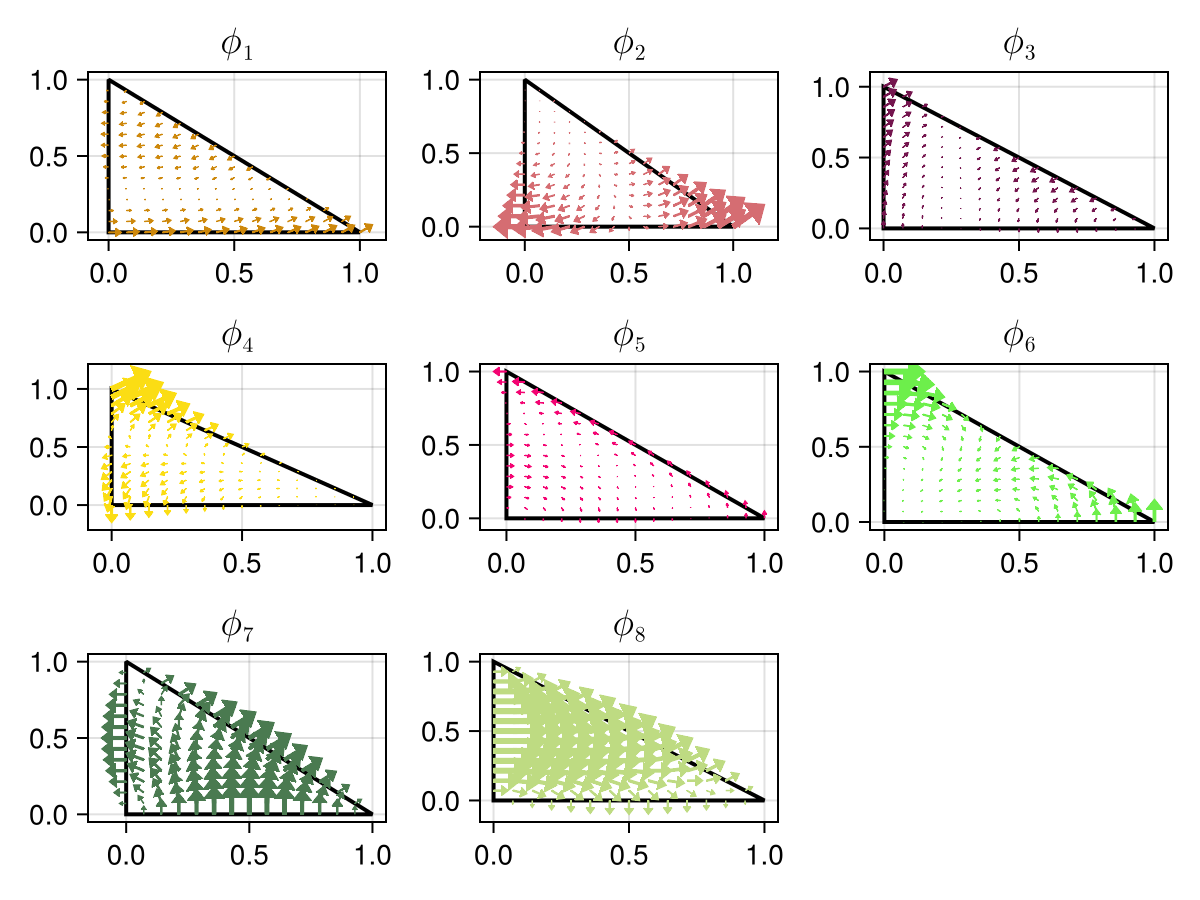

In [13]:
@variables u[1:2]
N1_f = [eval(build_function(N1[i], u)[1]) for i in eachindex(N1)]
f1 = plot_nedelec_functions_on_triangle(N1_f, density = 15)

### $N_2^I$ : Nedelec (First kind) of degree 2

In [14]:
N2 = N1k(2)

15-element Vector{Vector{SymbolicUtils.BasicSymbolic{Real}}}:
 [(1//1) - (11//1)*u[2] + (25//1)*(u[2]^2) - (15//1)*(u[2]^3), u[1] - (10//1)*u[1]*u[2] + (15//1)*u[1]*(u[2]^2)]
 [-(3//1) + (6//1)*u[1] + (51//2)*u[2] - (45//1)*u[1]*u[2] - (45//1)*(u[2]^2) + (45//1)*u[1]*(u[2]^2) + (45//2)*(u[2]^3), -(9//2)*u[1] + (15//2)*(u[1]^2) + (30//1)*u[1]*u[2] - (45//1)*(u[1]^2)*u[2] - (45//2)*u[1]*(u[2]^2)]
 [(5//1) - (30//1)*u[1] - (35//2)*u[2] + (30//1)*(u[1]^2) + (75//1)*u[1]*u[2] + (20//1)*(u[2]^2) - (45//1)*(u[1]^2)*u[2] - (45//1)*u[1]*(u[2]^2) - (15//2)*(u[2]^3), (25//2)*u[1] - (105//2)*(u[1]^2) - (20//1)*u[1]*u[2] + (45//1)*(u[1]^3) + (45//1)*(u[1]^2)*u[2] + (15//2)*u[1]*(u[2]^2)]
 [u[2] - (10//1)*u[1]*u[2] + (15//1)*(u[1]^2)*u[2], (1//1) - (11//1)*u[1] + (25//1)*(u[1]^2) - (15//1)*(u[1]^3)]
 [-(9//2)*u[2] + (30//1)*u[1]*u[2] + (15//2)*(u[2]^2) - (45//2)*(u[1]^2)*u[2] - (45//1)*u[1]*(u[2]^2), -(3//1) + (51//2)*u[1] + (6//1)*u[2] - (45//1)*(u[1]^2) - (45//1)*u[1]*u[2] + (45//2)*(u[1]^3) + (45

In [15]:
N2xy = replace_u_xy(N2)
for ni in eachindex(N2xy)
    display(N2xy[ni])
end

2-element Vector{Num}:
 (1//1) - (11//1)*y + (25//1)*(y^2) - (15//1)*(y^3)
                  x - (10//1)*x*y + (15//1)*x*(y^2)

2-element Vector{Num}:
 -(3//1) + (6//1)*x + (51//2)*y - (45//1)*x*y - (45//1)*(y^2) + (45//1)*x*(y^2) + (45//2)*(y^3)
                    -(9//2)*x + (15//2)*(x^2) + (30//1)*x*y - (45//1)*(x^2)*y - (45//2)*x*(y^2)

2-element Vector{Num}:
 (5//1) - (30//1)*x - (35//2)*y + (30//1)*(x^2) + (75//1)*x*y + (20//1)*(y^2) - (45//1)*(x^2)*y - (45//1)*x*(y^2) - (15//2)*(y^3)
                                     (25//2)*x - (105//2)*(x^2) - (20//1)*x*y + (45//1)*(x^3) + (45//1)*(x^2)*y + (15//2)*x*(y^2)

2-element Vector{Num}:
                  y - (10//1)*x*y + (15//1)*(x^2)*y
 (1//1) - (11//1)*x + (25//1)*(x^2) - (15//1)*(x^3)

2-element Vector{Num}:
                    -(9//2)*y + (30//1)*x*y + (15//2)*(y^2) - (45//2)*(x^2)*y - (45//1)*x*(y^2)
 -(3//1) + (51//2)*x + (6//1)*y - (45//1)*(x^2) - (45//1)*x*y + (45//2)*(x^3) + (45//1)*(x^2)*y

2-element Vector{Num}:
                                     (25//2)*y - (20//1)*x*y - (105//2)*(y^2) + (15//2)*(x^2)*y + (45//1)*x*(y^2) + (45//1)*(y^3)
 (5//1) - (35//2)*x - (30//1)*y + (20//1)*(x^2) + (75//1)*x*y + (30//1)*(y^2) - (15//2)*(x^3) - (45//1)*(x^2)*y - (45//1)*x*(y^2)

2-element Vector{Num}:
 -(6//1)*y + (20//1)*x*y + (20//1)*(y^2) - (15//1)*(x^2)*y - (30//1)*x*(y^2) - (15//1)*(y^3)
  (6//1)*x - (20//1)*(x^2) - (20//1)*x*y + (15//1)*(x^3) + (30//1)*(x^2)*y + (15//1)*x*(y^2)

2-element Vector{Num}:
 (3//1)*y + (15//1)*x*y - (45//2)*(y^2) - (45//2)*(x^2)*y + (45//2)*(y^3)
 (3//1)*x - (45//2)*(x^2) + (15//1)*x*y + (45//2)*(x^3) - (45//2)*x*(y^2)

2-element Vector{Num}:
 -(5//1)*x*y + (5//2)*(y^2) - (15//2)*(x^2)*y + (30//1)*x*(y^2) - (15//2)*(y^3)
 -(5//2)*(x^2) + (5//1)*x*y + (15//2)*(x^3) - (30//1)*(x^2)*y + (15//2)*x*(y^2)

2-element Vector{Num}:
   (10//1)*y - (20//1)*x*y - (40//1)*(y^2) + (60//1)*x*(y^2) + (30//1)*(y^3)
 (10//1)*x - (10//1)*(x^2) + (40//1)*x*y - (60//1)*(x^2)*y - (30//1)*x*(y^2)

2-element Vector{Num}:
 (10//1)*y + (40//1)*x*y - (10//1)*(y^2) - (30//1)*(x^2)*y - (60//1)*x*(y^2)
   (10//1)*x - (40//1)*(x^2) - (20//1)*x*y + (30//1)*(x^3) + (60//1)*(x^2)*y

2-element Vector{Num}:
   (10//1)*y - (110//1)*x*y + (5//1)*(y^2) + (135//1)*(x^2)*y + (60//1)*x*(y^2) - (15//1)*(y^3)
 -(50//1)*x + (185//1)*(x^2) + (10//1)*x*y - (135//1)*(x^3) - (60//1)*(x^2)*y + (15//1)*x*(y^2)

2-element Vector{Num}:
 -(35//1)*y + (160//1)*x*y + (35//1)*(y^2) - (75//1)*(x^2)*y - (150//1)*x*(y^2)
    (25//1)*x - (100//1)*(x^2) - (50//1)*x*y + (75//1)*(x^3) + (150//1)*(x^2)*y

2-element Vector{Num}:
  (30//1)*y - (105//1)*x*y - (195//2)*(y^2) + (135//2)*(x^2)*y + (180//1)*x*(y^2) + (135//2)*(y^3)
 -(60//1)*x + (255//2)*(x^2) + (165//1)*x*y - (135//2)*(x^3) - (180//1)*(x^2)*y - (135//2)*x*(y^2)

2-element Vector{Num}:
 -(135//2)*y + (90//1)*x*y + (405//2)*(y^2) - (45//2)*(x^2)*y - (135//1)*x*(y^2) - (135//1)*(y^3)
          -(45//1)*(x^2) - (135//1)*x*y + (45//2)*(x + x^3) + (135//1)*(x^2)*y + (135//1)*x*(y^2)

#### Test if each N_i activates only dof_i

In [169]:
verify(N2, 2)

isdiag(M) = true
dof_i(Nj) = 


15×15 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0

#### Check the degree of the curl ($∇×N_i$)

In [16]:
verify_curl_degree(N2, u, 2)

∇×N1 = (12//1) - (60//1)*y + (60//1)*(y^2)
∇×N2 = -(30//1) + (60//1)*x + (120//1)*y - (180//1)*x*y - (90//1)*(y^2)
∇×N3 = (30//1) - (180//1)*x - (60//1)*y + (180//1)*(x^2) + (180//1)*x*y + (30//1)*(y^2)
∇×N4 = -(12//1) + (60//1)*x - (60//1)*(x^2)
∇×N5 = (30//1) - (120//1)*x - (60//1)*y + (90//1)*(x^2) + (180//1)*x*y
∇×N6 = -(30//1) + (60//1)*x + (180//1)*y - (30//1)*(x^2) - (180//1)*x*y - (180//1)*(y^2)
∇×N7 = (12//1) - (60//1)*x - (60//1)*y + (60//1)*(x^2) + (120//1)*x*y + (60//1)*(y^2)
∇×N8 = -(60//1)*x + (60//1)*y + (90//1)*(x^2) - (90//1)*(y^2)
∇×N9 = (30//1)*(x^2) - (120//1)*x*y + (30//1)*(y^2)
∇×N10 = (120//1)*y - (240//1)*x*y - (120//1)*(y^2)
∇×N11 = -(120//1)*x + (120//1)*(x^2) + (240//1)*x*y
∇×N12 = -(60//1) + (480//1)*x - (540//1)*(x^2) - (240//1)*x*y + (60//1)*(y^2)
∇×N13 = (60//1) - (360//1)*x - (120//1)*y + (300//1)*(x^2) + (600//1)*x*y
∇×N14 = -(90//1) + (360//1)*x + (360//1)*y - (270//1)*(x^2) - (720//1)*x*y - (270//1)*(y^2)
∇×N15 = (135//2) - (180//1)*x - (540//1)*y + (

true